In [1]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import pandas as pd

In [ ]:
#points = np.random.rand(2000, 3)
points = np.random.normal(0, 1, [2000,3])
df_points = pd.DataFrame(points, columns='x y z'.split())
df_points['distance'] = np.sqrt(np.power(df_points.iloc[:,:3], 2).sum(axis=1))
df_points['color'] = np.where(df_points.distance<1, 'blue', 'red')

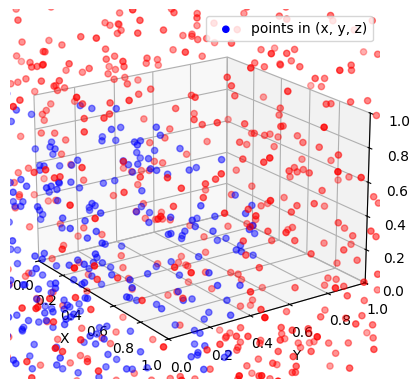

In [3]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(
            xs = df_points['x'],
            ys = df_points['y'],
            zs = df_points['z'],
            #zdir='y', 
            c=df_points['color'], 
            label='points in (x, y, z)')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35, roll=0)

plt.show()

In [4]:
fig1 = px.scatter_3d(
    df_points, 
    x = 'x', y = 'y', z = 'z',
    color='color',
    color_discrete_map="identity",
    height=700, width=700
)
fig1.show()

In [5]:
import ipywidgets as widgets

def plot_radii(radius=1):
    df_points['color'] = np.where(df_points.distance<radius, 
                                  'blue', 
                                  'red')
    fig = px.scatter_3d(
        df_points, 
        x='x', 
        y='y', 
        z ='z',
        color='color',
        height=700,
        width=700,
        color_discrete_map="identity"
    )

    fig.show()

widgets.interact(plot_radii,
                radius=widgets.FloatSlider(min=0, 
                                           max=2, 
                                           step=0.01, 
                                           value=0.5,)
                )

interactive(children=(FloatSlider(value=0.5, description='radius', max=2.0, step=0.01), Output()), _dom_classe…

<function __main__.plot_radii(radius=1)>

In [6]:
from ipywidgets import IntSlider

def plot_binomial(seed=123):
   np.random.seed(seed)
   numbers = np.random.binomial(1, 0.5, 10)
   fig = px.histogram(x=numbers,
                      height=600,
                      width=600,
                      title=f"Binomial Distribution(n={1}, p=0.5)",                   
                      range_x=[-0.5, 1+0.5]
                     )
   fig.update_traces(xbins=dict(start=-0.5, end=1+0.5, size=1)) # Fixed bin size   
   fig.show()
  
widgets.interact(plot_binomial,
                seed = IntSlider(min=0,max=20, step=1)           
                )


interactive(children=(IntSlider(value=0, description='seed', max=20), Output()), _dom_classes=('widget-interac…

<function __main__.plot_binomial(seed=123)>

In [7]:
from ipywidgets import IntSlider
from ipywidgets import FloatSlider

def plot_binomial(n=1, p=0.5, size=10, seed=123):
  np.random.seed(seed)
  numbers = np.random.binomial(n, p, size)
  fig = px.histogram(x=numbers,
                     height=600,
                     width=600,
                     title=f"Binomial Distribution(n={n}, p={p})",                  
                     range_x=[-0.5, n+0.5]
                    )
  fig.update_traces(xbins=dict(start=-0.5, end=n+0.5, size=1)) # Fixed bin size  
  fig.show()


widgets.interact(plot_binomial,
               seed = IntSlider(min=0,max=20, step=1, value=1),
               n    = IntSlider(min=1,max=20, step=1,),          
               p    = FloatSlider(min=0, max=1, step=0.02, value=0.5),
               size = IntSlider(min=0,   max=100_000, step=10, value=10),
               )


interactive(children=(IntSlider(value=1, description='n', max=20, min=1), FloatSlider(value=0.5, description='…

<function __main__.plot_binomial(n=1, p=0.5, size=10, seed=123)>

In [8]:
from ipywidgets import IntSlider
from ipywidgets import FloatSlider

def plot_binomial(n=1, p=0.5, size=10, seed=123):
   np.random.seed(seed)
   numbers = np.random.binomial(n, p, size)
   fig = px.histogram(x=numbers,
                      height=600,
                      width=600,
                      title=f"Binomial Distribution(n={n}, p={p})",                   
                      range_x=[-0.5, n+0.5]
                     )
   fig.update_traces(xbins=dict(start=-0.5, end=n+0.5, size=1)) # Fixed bin size   
   fig.show()
  
widgets.interact(plot_binomial,
                seed = IntSlider(min=0,max=20, step=1, value=1),
                n    = IntSlider(min=1,max=20, step=1,),           
                p    = FloatSlider(min=0, max=1, step=0.02, value=0.5),
                size = IntSlider(min=0,   max=100_000, step=10, value=10),
                )


interactive(children=(IntSlider(value=1, description='n', max=20, min=1), FloatSlider(value=0.5, description='…

<function __main__.plot_binomial(n=1, p=0.5, size=10, seed=123)>

# Extra - plotly go

In [9]:
import plotly.graph_objects as go
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Create figure widget
fig = go.FigureWidget()

# Initial plot
inside = np.sqrt(np.sum(points**2, axis=1)) <= 0.5
df_points['color'] = ['blue' if k else 'red' for k in inside]

for color in ['blue', 'red']:
    mask = df_points['color'] == color
    fig.add_trace(go.Scatter3d(
        x=df_points[mask]['x'],
        y=df_points[mask]['y'],
        z=df_points[mask]['z'],
        mode='markers',
        marker=dict(size=3, color=color),
        name=color
    ))

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y', 
        zaxis_title='Z',
        aspectmode='cube'
    ),
    height=600,
    width=600,
    showlegend=False
)

# Create slider
radius_slider = widgets.FloatSlider(
    min=0, max=2, step=0.05, value=0.5,
    description='Radius:'
)

def update_plot(change):
    radius = change['new']
    inside = np.sqrt(np.sum(points**2, axis=1)) <= radius
    df_points['color'] = ['blue' if k else 'red' for k in inside]
    
    # Update the data without recreating the figure
    with fig.batch_update():
        blue_mask = df_points['color'] == 'blue'
        red_mask = df_points['color'] == 'red'
        
        fig.data[0].x = df_points[blue_mask]['x']
        fig.data[0].y = df_points[blue_mask]['y'] 
        fig.data[0].z = df_points[blue_mask]['z']
        
        fig.data[1].x = df_points[red_mask]['x']
        fig.data[1].y = df_points[red_mask]['y']
        fig.data[1].z = df_points[red_mask]['z']

# Connect the slider to the update function
radius_slider.observe(update_plot, names='value')

# Display the widget
display(radius_slider, fig)

FloatSlider(value=0.5, description='Radius:', max=2.0, step=0.05)

FigureWidget({
    'data': [{'marker': {'color': 'blue', 'size': 3},
              'mode': 'markers',
              'name': 'blue',
              'type': 'scatter3d',
              'uid': '5fc39c0a-10d9-4e2f-b351-6c520c0c6840',
              'x': {'bdata': ('100p0FSOvL8KUOqZEhbEv4RqT+0vqN' ... '6H/1GrvL9asU/Qz7vZv+58ZWFvi8w/'),
                    'dtype': 'f8'},
              'y': {'bdata': ('Bu6lcH0brD/gxvPZxxzIv9xyundJIL' ... '5ngyDvxj+7UP++xjTCv9g4/N4fDMM/'),
                    'dtype': 'f8'},
              'z': {'bdata': ('vues1VA83b/vQH+RrMPUPx0xznNJN8' ... 'XUDUST2D/ueBxkNzmjPw0bizCIv9m/'),
                    'dtype': 'f8'}},
             {'marker': {'color': 'red', 'size': 3},
              'mode': 'markers',
              'name': 'red',
              'type': 'scatter3d',
              'uid': '13b26adf-3d8c-431b-823d-dde1148c3332',
              'x': {'bdata': ('axB5WoEr5T+tOTsAKsfTv9w5zLizdM' ... 'U+W/K/B9Rs1AIIz79xSVx4Tebyvw=='),
                    'dtype': 'f8'},
        

In [ ]:
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact, IntSlider, FloatSlider, Checkbox
from scipy.stats import binom

layout = widgets.Layout(width='auto', height='40px') #set width and height

def plot_binomial(n=10, p=0.5, samples=1000, random_seed=123, normalized=False):
    # Generate random data from binomial distribution
    np.random.seed(random_seed)
    data = np.random.binomial(n, p, samples)

    # Histogram
    hist = go.Histogram(
        x=data,
        name="Sampled Data",
        histnorm="probability density" if normalized else None,
        opacity=0.6,
        xbins=dict(
            start=-0.5,  # Start of the first bin
            end=n+0.5,     # End of the last bin
            size=1)   # Width of each bin)
    )

    
    # Theoretical distribution
    x = np.arange(0, n+1)
    y = binom.pmf(x, n, p)*(1 if normalized else len(data))
    curve = go.Scatter(
        x=x,
        y=y,
        mode='lines+markers',
        name="Binomial PMF",
        line=dict(color="red")
    )

    # Style Figure
    fig = go.Figure([hist, curve])
    fig.update_layout(
        title=f"Binomial Distribution (n={n}, p={p})",
        xaxis_title="k (Number of Successes)",
        yaxis_title="Probablility" if normalized else "Counts",
        bargap=0.2,
    )
    fig.show()



style = {'description_width': 'initial'}
# Interactive controls
interact(
    plot_binomial,
    n=IntSlider(min=1, max=100, step=10, value=10, description="n (Number of Trials)", style= style),
    p=FloatSlider(min=0, max=1, step=0.05, value=0.5, description="p (Probability of Success)", style= style),
    samples=IntSlider(min=100, max=100000, step=1000, value=1000, description="Number of samples", style= style),
    random_seed = IntSlider(min=1, max=10000, step=100, value=500, style= style),
    normilized = Checkbox(value=False, description='Normalize Distribution?'),
)

interactive(children=(IntSlider(value=10, description='n (Number of Trials)', min=1, step=10, style=SliderStyl…

<function __main__.plot_binomial(n=10, p=0.5, samples=1000, random_seed=123, normalized=False)>